In [1]:
import pandas as pd


In [4]:
df=pd.read_csv(r'C:\Users\Lenovo\OneDrive\Desktop\practice\CaseStudy2-student_performance_regression.csv')

In [5]:
df.head()

,Study_Hours,Previous_Score,Sleep_Hours,Attendance_Rate,Practice_Tests,Final_Score
0,1.5,45,6.5,65,2,52
1,2.0,50,7.0,70,3,58
2,2.5,48,6.0,68,2,55
3,3.0,55,7.5,75,4,65
4,3.5,52,7.0,72,3,62


In [6]:
df.shape

(306, 6)

In [8]:
df.columns

Index(['Study_Hours', 'Previous_Score', 'Sleep_Hours', 'Attendance_Rate',
       'Practice_Tests', 'Final_Score'],
      dtype='object')

In [14]:
df.duplicated().sum()

np.int64(114)

In [15]:
df.isnull().sum()

Study_Hours        0
Previous_Score     0
Sleep_Hours        0
Attendance_Rate    0
Practice_Tests     0
Final_Score        0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Study_Hours      306 non-null    float64
 1   Previous_Score   306 non-null    int64  
 2   Sleep_Hours      306 non-null    float64
 3   Attendance_Rate  306 non-null    int64  
 4   Practice_Tests   306 non-null    int64  
 5   Final_Score      306 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 14.5 KB


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Study_Hours', ylabel='Count'>

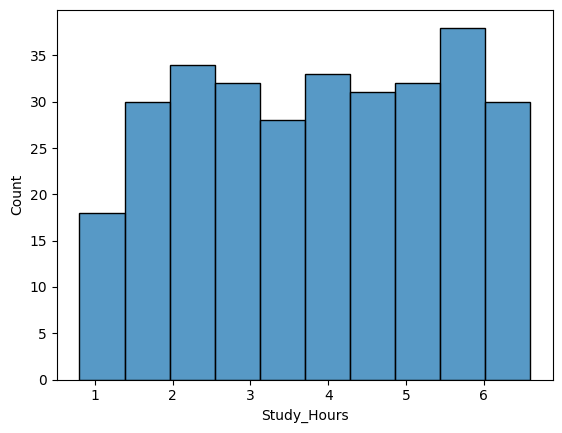

In [ ]:
sns.histplot(x=df['Study_Hours'])


<Axes: xlabel='Study_Hours'>

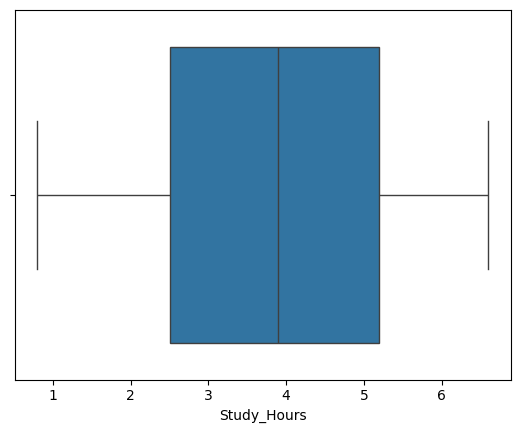

In [11]:
sns.boxplot(x=df['Study_Hours'])


<Axes: xlabel='Previous_Score', ylabel='Count'>

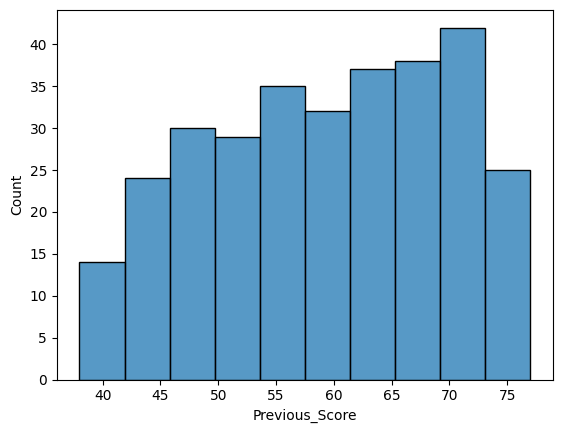

In [16]:
sns.histplot(x=df['Previous_Score'])

<Axes: xlabel='Final_Score', ylabel='Count'>

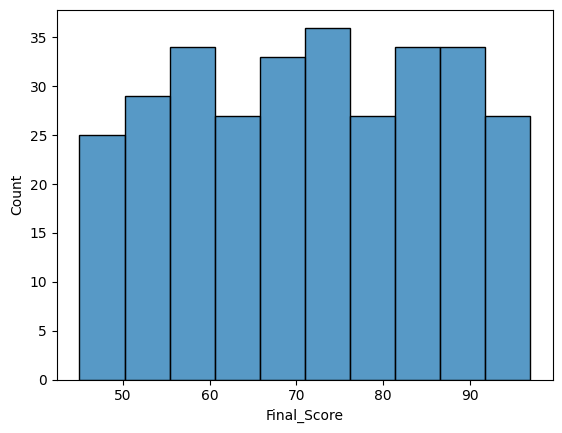

In [17]:
sns.histplot(x=df['Final_Score'])

<Axes: xlabel='Study_Hours', ylabel='Final_Score'>

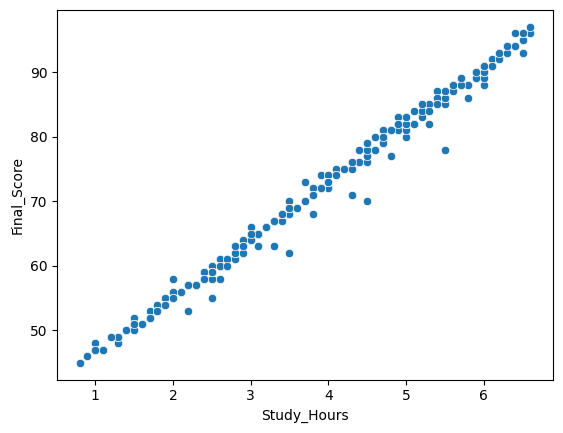

In [50]:
sns.scatterplot(x=df['Study_Hours'],y=df['Final_Score'])

<Axes: >

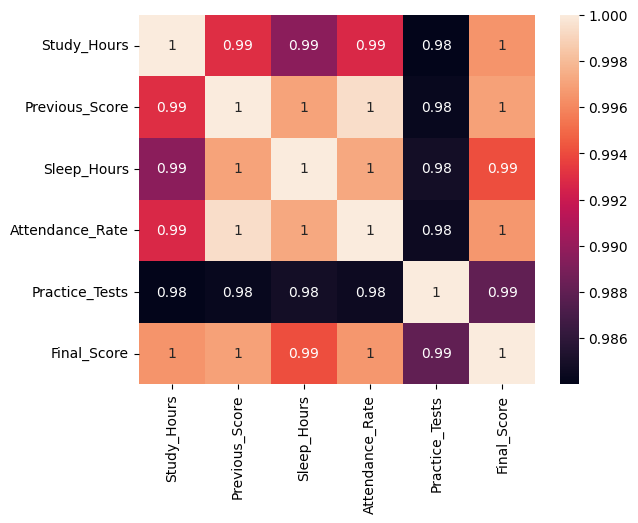

In [20]:
sns.heatmap(df.corr(),annot=True)

In [46]:
x1=df[['Study_Hours']]
y=df['Final_Score']


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
lr=LinearRegression()
pf=PolynomialFeatures(degree=2)




In [28]:
model1=lr.fit(x1,y)
y_pred1=model1.predict(x1)
r2_score(y,y_pred1)

0.992905468800311

In [ ]:
x_poly=pf.fit_transform(x1)
model=lr.fit(x_poly,y)
y_pred=model.predict(x_poly)
r2_score(y,y_pred)



0.9929198844863503

In [30]:
x2=df.drop('Final_Score',axis=1)


In [31]:
model1=lr.fit(x2,y)
y_pred1=model1.predict(x2)
r2_score(y,y_pred1)

0.9973958168254083

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x2, y, test_size=0.33, random_state=42)

In [48]:
y_train.shape

(205,)

In [49]:
x_poly=pf.fit_transform(X_train)
x_test_poly=pf.transform(X_test)
model=lr.fit(x_poly,y_train)
y_pred=model.predict(x_test_poly)
r2_score(y_test,y_pred)


0.9987087859684775